<a href="https://colab.research.google.com/github/Amal-Alalami/Projects-CV/blob/main/copy1OfProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from google.colab.patches import cv2_imshow

# to generate data
from keras.preprocessing.image import ImageDataGenerator

# to build model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
%matplotlib inline

# Upload Dataset

In [3]:
!7z x archive.zip



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 35779075 bytes (35 MiB)

Extracting archive: archive.zip
 64% 4096 Open              --
Path = archive.zip
Type = zip
Physical Size = 35779075

  0%     11% 787 - Alzheimer_s Dataset/test/NonDemented/32 (60).jpg                                                            23% 1561 - Alzheimer_s Dataset/train/MildDemented/mildDem352.jpg                                                                  33% 2174 - Alzheimer_s Dataset/train/Non

# **Explore Data Characteristics and Visualize Sample Images**

In [2]:
images = []
classes = []
for subfolder in os.listdir('/content/Alzheimer_s Dataset'):
    subfolder_path = os.path.join('/content/Alzheimer_s Dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            classes.append(folder)
df = pd.DataFrame({'image': images, 'class': classes})
df

,image,class
0,/content/Alzheimer_s Dataset/test/VeryMildDeme...,VeryMildDemented
1,/content/Alzheimer_s Dataset/test/VeryMildDeme...,VeryMildDemented
2,/content/Alzheimer_s Dataset/test/VeryMildDeme...,VeryMildDemented
3,/content/Alzheimer_s Dataset/test/VeryMildDeme...,VeryMildDemented
4,/content/Alzheimer_s Dataset/test/VeryMildDeme...,VeryMildDemented
...,...,...
6395,/content/Alzheimer_s Dataset/train/ModerateDem...,ModerateDemented
6396,/content/Alzheimer_s Dataset/train/ModerateDem...,ModerateDemented
6397,/content/Alzheimer_s Dataset/train/ModerateDem...,ModerateDemented
6398,/content/Alzheimer_s Dataset/train/ModerateDem...,ModerateDemented


In [3]:
img = cv2.imread(images[6390])
img.shape
#print(img)

(208, 176, 3)

In [4]:
img = cv2.imread(images[2003])
img.shape

(208, 176, 3)

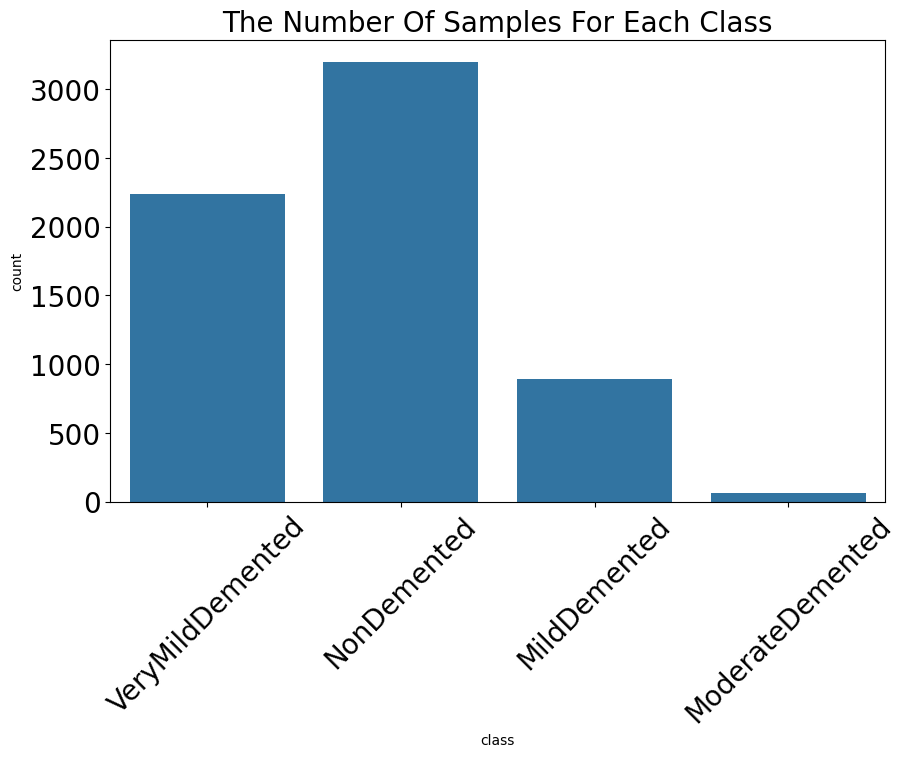

In [5]:
# prompt: Using dataframe df: bar plot  with title : The Number Of Samples For Each Class,   x axis is labels, y axis is count , font size for all is 20 , xticks (rotation=45)

plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)

plt.title('The Number Of Samples For Each Class', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# **Oversampling data**

In [6]:
image_generator = ImageDataGenerator(rescale = 1/255)
Size=(180,180)
train_image_generator = image_generator.flow_from_dataframe(df ,x_col='image', y_col='class',
                                    target_size=Size, batch_size=6500,
                                    shuffle=False)

for i in range(len(train_image_generator)):
    train_image, train_labels = train_image_generator[i]

Found 6400 validated image filenames belonging to 4 classes.


In [ ]:
oversampler = SMOTE(random_state=42)
oversampled_train_image, oversampled_train_labels = oversampler.fit_resample(
    train_image.reshape(-1,180 * 180 * 3),
    train_labels)

oversampled_train_image.reshape((-1, 180, 180, 3))

# **Build model**

In [ ]:
# CNN model
model = Sequential()
inputSize = (180,180,3)

#ilters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 32)        0

In [20]:
batch_size = 30
train_image_generator = image_generator.flow_from_directory('Alzheimer_s Dataset/train',
                                                            target_size=(180,180,3),
                                                            batch_size= batch_size,
                                                            class_mode='categorical')

Found 5121 images belonging to 4 classes.


In [ ]:
batch_size = 30
test_image_generator = image_generator.flow_from_directory('Alzheimer_s Dataset/test',
                                                            target_size=inputSize[:2],
                                                            batch_size= batch_size,
                                                            class_mode='categorical')

Found 1279 images belonging to 4 classes.


In [22]:
train_image_generator.class_indices


{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
results = model.fit(train_image_generator, epochs=100, validation_data=test_image_generator)

Epoch 1/100
171/171 [==============================] - 267s 2s/step - loss: 0.9261 - accuracy: 0.5620 - val_loss: 0.9443 - val_accuracy: 0.5880
Epoch 2/100
171/171 [==============================] - 263s 2s/step - loss: 0.5668 - accuracy: 0.7600 - val_loss: 0.9968 - val_accuracy: 0.5919
Epoch 3/100
171/171 [==============================] - 263s 2s/step - loss: 0.2544 - accuracy: 0.9063 - val_loss: 1.2979 - val_accuracy: 0.5950
Epoch 4/100
171/171 [==============================] - 261s 2s/step - loss: 0.1146 - accuracy: 0.9588 - val_loss: 1.3939 - val_accuracy: 0.5942
Epoch 5/100
171/171 [==============================] - 254s 1s/step - loss: 0.0532 - accuracy: 0.9826 - val_loss: 1.4524 - val_accuracy: 0.6106
Epoch 6/100
171/171 [==============================] - 270s 2s/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 1.7476 - val_accuracy: 0.5489
Epoch 7/100
171/171 [==============================] - 256s 1s/step - loss: 0.0365 - accuracy: 0.9873 - val_loss: 2.1342 - val_accuracy: